In [574]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd


# Modelling
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import confusion_matrix, classification_report 

#from imblearn.over_sampling import SMOTE


# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [575]:
# Data Loading

#Step 1: Load Data Files and Libraries

# The dataset comprises exchanges made by Visas. This dataset has 491 extortion exchanges out of 284 808 exchanges. 
# That makes it exceptionally uneven; the positive class (cheats) represents 0.172% of all exchanges.


#training data
data = pd.read_csv('https://raw.githubusercontent.com/SantiagoArenas/MachineLearning/main/austinHousingData.csv')
data.head()
data = data[data['homeType'] != 'Other']
desired_home_types = ['Condo', 'Single Family', 'Townhouse']
data = data[data['homeType'].isin(desired_home_types)]


print ("Original data", data.shape)

data

Original data (14885, 47)


,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15165,29504086,austin,9013 Marsh Dr,78748,This 3 bedroom home is nestled among mature sh...,30.185915,-97.828415,1.98,2,False,...,1,1,2.133333,5.666667,1537,16,2.0,3,1,29504086_f55db59cbebad30d475f31e6aee0d020-p_f.jpg
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg
15167,241937773,austin,1413 Waterloo Shore Ln UNIT 12,78741,This contemporary three-story detached condo h...,30.240223,-97.772835,1.98,2,True,...,1,1,1.900000,6.666667,1226,16,4.0,3,3,241937773_66d3e483bd783eac5a52ff5f938d2a2e-p_f...
15168,29473281,austin,2206 S 3rd St,78704,Original bungalow with a modern addition. Larg...,30.244835,-97.761124,1.98,2,False,...,1,1,0.800000,5.000000,889,13,3.0,3,2,29473281_9e90ec4652c4b3b6592a7fdd09f1ea6d-p_f.jpg


In [576]:
data = data.drop(["description","homeImage","zpid","streetAddress","latest_saledate","latestPriceSource", 'garageSpaces'], axis=1)
data = data[data['city'] == 'austin']
data = data.drop(["city"], axis=1)


In [577]:
# Cheking NaN /null values
data.isnull().sum()*100/data.shape[0]

        

zipcode                       0.0
latitude                      0.0
longitude                     0.0
propertyTaxRate               0.0
hasAssociation                0.0
hasCooling                    0.0
hasGarage                     0.0
hasHeating                    0.0
hasSpa                        0.0
hasView                       0.0
homeType                      0.0
parkingSpaces                 0.0
yearBuilt                     0.0
latestPrice                   0.0
numPriceChanges               0.0
latest_salemonth              0.0
latest_saleyear               0.0
numOfPhotos                   0.0
numOfAccessibilityFeatures    0.0
numOfAppliances               0.0
numOfParkingFeatures          0.0
numOfPatioAndPorchFeatures    0.0
numOfSecurityFeatures         0.0
numOfWaterfrontFeatures       0.0
numOfWindowFeatures           0.0
numOfCommunityFeatures        0.0
lotSizeSqFt                   0.0
livingAreaSqFt                0.0
numOfPrimarySchools           0.0
numOfElementar

In [578]:
cat_cols = data.select_dtypes(include=['bool']).columns.to_list()
new_column_names = [
    'Dmy_association',
    'Dmy_cooling',
    'Dmy_garage',
    'Dmy_heating',
    'Dmy_spa',
    'Dmy_view'
]
data=pd.get_dummies(data, columns=cat_cols, prefix=new_column_names,drop_first=True, dtype= 'int64' ) 

In [579]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        data.drop(columns = "homeType"),
                                        data['homeType'],
                                        random_state = 123,
                                        test_size=0.3
                                    )


In [580]:
data['homeType'].value_counts()

Single Family    14096
Condo              467
Townhouse          174
Name: homeType, dtype: int64

In [581]:
desired_samples = 1000
from imblearn.over_sampling import SMOTE
sampling_strategy = {'Condo': desired_samples,
                     'Townhouse': desired_samples}
#                     'Multiple Occupancy': desired_samples}
#                     'Vacant Land': desired_samples,
#                     'Apartment': desired_samples,
#                     'Residential' : desired_samples,
#                     'Mobile / Manufactured': desired_samples,
#                     'MultiFamily': desired_samples}
sm1 = SMOTE(sampling_strategy=sampling_strategy, random_state=123, k_neighbors=3)
X_train_res, y_train_res = sm1.fit_resample(X_train, y_train.ravel())
print('After Over Sampling, the shape of the train_X: {}'.format(X_train_res.shape))

After Over Sampling, the shape of the train_X: (11873, 38)


In [582]:
# Get unique values and their counts
unique_values, counts = np.unique(y_train_res, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: Condo, Count: 1000
Value: Single Family, Count: 9873
Value: Townhouse, Count: 1000


In [583]:
# sampling_strategy: float, str, dict or callable, default=’auto’
# float is only for binary classification,  the ratio is expressed as N_rm / N_M,  where N_rm
# is the number of samples in the minority class after resampling and N_M is the number of samples in the majority class.



In [584]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler() #feature_range=(0, 2) insise parenthesis if a different scale is needed
names = X_train_res.columns  # collecting names of columns
d = scaler.fit_transform(X_train_res)  # transforming data to normalized
gc_norm = pd.DataFrame(d, columns=names) # creation of dataframe normalized 
gc_norm.head()

,zipcode,latitude,longitude,propertyTaxRate,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,latest_saleyear,...,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,Dmy_association_True,Dmy_cooling_True,Dmy_garage_True,Dmy_heating_True,Dmy_spa_True,Dmy_view_True
0,0.607477,0.952254,0.573708,1.0,0.090909,0.852174,0.030694,0.000000,0.454545,0.666667,...,0.666667,0.000000,0.500,0.333333,1.0,1.0,1.0,1.0,0.0,0.0
1,0.897196,0.137737,0.455133,0.0,0.000000,0.747826,0.019942,0.095238,0.636364,0.333333,...,0.444444,0.230769,0.375,0.333333,0.0,1.0,0.0,1.0,0.0,0.0
2,0.925234,0.500915,0.678596,0.0,0.045455,0.930435,0.010679,0.285714,0.727273,0.333333,...,0.666667,0.230769,0.625,0.333333,0.0,1.0,1.0,1.0,0.0,0.0
3,0.981308,0.578583,0.667179,0.0,0.090909,0.939130,0.036549,0.285714,0.272727,0.666667,...,0.666667,0.230769,0.375,0.333333,1.0,1.0,1.0,1.0,0.0,0.0
4,0.859813,0.182336,0.720868,0.0,0.136364,0.956522,0.026915,0.000000,0.363636,0.000000,...,0.222222,0.153846,0.375,0.000000,1.0,1.0,1.0,1.0,0.0,0.0


In [585]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler() #feature_range=(0, 2) insise parenthesis if a different scale is needed
names = X_test.columns  # collecting names of columns
d = scaler.fit_transform(X_test)  # transforming data to normalized
gc_norm = pd.DataFrame(d, columns=names) # creation of dataframe normalized 
gc_norm.head()

,zipcode,latitude,longitude,propertyTaxRate,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,latest_saleyear,...,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,Dmy_association_True,Dmy_cooling_True,Dmy_garage_True,Dmy_heating_True,Dmy_spa_True,Dmy_view_True
0,0.603774,0.993587,0.614633,1.0,0.3,0.823009,0.092056,0.045455,0.818182,0.666667,...,0.666667,0.111111,0.20,0.333333,1.0,1.0,1.0,1.0,0.0,0.0
1,1.000000,0.800621,0.559222,0.0,0.0,0.601770,0.085821,0.045455,0.727273,0.333333,...,0.666667,0.074074,0.20,0.000000,0.0,1.0,0.0,1.0,0.0,0.0
2,0.952830,0.660106,0.811102,0.0,0.1,0.884956,0.041960,0.000000,0.272727,0.000000,...,0.222222,0.111111,0.15,0.333333,1.0,1.0,1.0,1.0,0.0,0.0
3,0.481132,0.356290,0.611160,0.0,0.0,0.292035,0.106774,0.090909,0.181818,0.000000,...,0.444444,0.037037,0.10,0.000000,0.0,1.0,0.0,1.0,0.0,0.0
4,1.000000,0.795986,0.554343,0.0,0.0,0.592920,0.062986,0.136364,0.181818,0.333333,...,0.666667,0.074074,0.20,0.000000,0.0,1.0,0.0,1.0,0.0,0.0


In [586]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

n_neighbors = 3
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_res, y_train_res)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_res, y_train_res)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


pred = knn.predict(X_test)
print(" Confusion matrix test \n",confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.92
 Confusion matrix test 
 [[  35   83   33]
 [ 123 4026   74]
 [  11   24   13]]
               precision    recall  f1-score   support

        Condo       0.21      0.23      0.22       151
Single Family       0.97      0.95      0.96      4223
    Townhouse       0.11      0.27      0.15        48

     accuracy                           0.92      4422
    macro avg       0.43      0.49      0.45      4422
 weighted avg       0.94      0.92      0.93      4422



El K óptimo es:  34


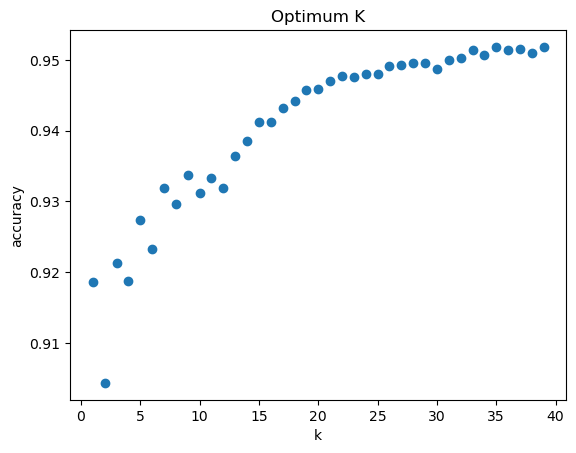

In [587]:
# SDelection of optimum K
k_range = range(1, 40)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_res, y_train_res)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.title("Optimum K")
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20, 25, 30, 35, 40])

print("El K óptimo es: ", scores.index(max(scores)))

In [588]:
scores

[0.9185888738127544,
 0.9043419267299865,
 0.921302578018996,
 0.9188150158299412,
 0.9274084124830394,
 0.923337856173677,
 0.9319312528267752,
 0.9296698326549073,
 0.9337403889642696,
 0.9312528267752148,
 0.933288104929896,
 0.9319312528267752,
 0.9364540931705111,
 0.9384893713251922,
 0.9412030755314338,
 0.9412030755314338,
 0.9432383536861149,
 0.944142921754862,
 0.9457259158751696,
 0.9459520578923564,
 0.9470827679782904,
 0.9477611940298507,
 0.947535052012664,
 0.9479873360470376,
 0.9479873360470376,
 0.9491180461329715,
 0.9493441881501583,
 0.949570330167345,
 0.949570330167345,
 0.9486657620985979,
 0.9500226142017186,
 0.9502487562189055,
 0.9513794663048395,
 0.9507010402532791,
 0.9518317503392131,
 0.9513794663048395,
 0.9516056083220262,
 0.9509271822704658,
 0.9518317503392131]

In [589]:
n_neighbors = scores.index(max(scores))
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_res, y_train_res)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_res, y_train_res)))


pred_train = knn.predict(X_train_res)
print(confusion_matrix(y_train_res, pred_train))
print(classification_report(y_train_res, pred_train))

Accuracy of K-NN classifier on training set: 0.88
[[ 169  727  104]
 [  45 9757   71]
 [  58  430  512]]
               precision    recall  f1-score   support

        Condo       0.62      0.17      0.27      1000
Single Family       0.89      0.99      0.94      9873
    Townhouse       0.75      0.51      0.61      1000

     accuracy                           0.88     11873
    macro avg       0.75      0.56      0.60     11873
 weighted avg       0.86      0.88      0.85     11873



In [590]:
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


pred_test = knn.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Accuracy of K-NN classifier on test set: 0.95
[[  13  115   23]
 [  14 4182   27]
 [   3   36    9]]
               precision    recall  f1-score   support

        Condo       0.43      0.09      0.14       151
Single Family       0.97      0.99      0.98      4223
    Townhouse       0.15      0.19      0.17        48

     accuracy                           0.95      4422
    macro avg       0.52      0.42      0.43      4422
 weighted avg       0.94      0.95      0.94      4422



El K óptimo es:  57


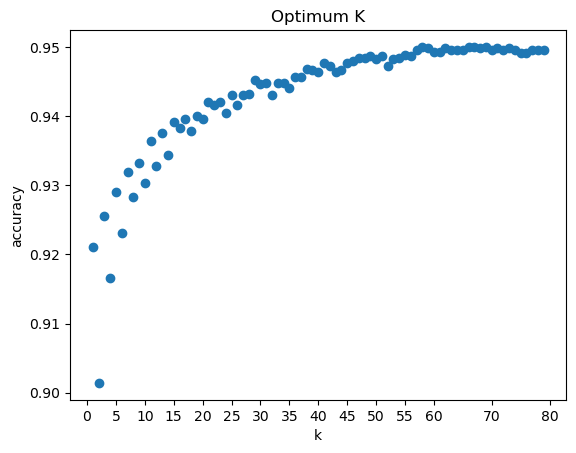

In [600]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Assuming X_train_res and X_test are sparse matrices
# You might need to use a sparse matrix representation, such as scipy.sparse.csr_matrix

# SDelection of optimum K
k_range = range(1, 80)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(X_train_res, y_train_res)
    # Use cosine similarity for prediction on sparse data
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.title("Optimum K")
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80])

print("El K óptimo es: ", scores.index(max(scores)))

In [601]:
n_neighbors = scores.index(max(scores))
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_res, y_train_res)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_res, y_train_res)))


pred_train = knn.predict(X_train_res)
print(confusion_matrix(y_train_res, pred_train))
print(classification_report(y_train_res, pred_train))

Accuracy of K-NN classifier on training set: 0.86
[[  19  877  104]
 [   8 9803   62]
 [  11  591  398]]
               precision    recall  f1-score   support

        Condo       0.50      0.02      0.04      1000
Single Family       0.87      0.99      0.93      9873
    Townhouse       0.71      0.40      0.51      1000

     accuracy                           0.86     11873
    macro avg       0.69      0.47      0.49     11873
 weighted avg       0.82      0.86      0.82     11873



In [602]:
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


pred_test = knn.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Accuracy of K-NN classifier on test set: 0.95
[[   6  131   14]
 [   1 4198   24]
 [   1   42    5]]
               precision    recall  f1-score   support

        Condo       0.75      0.04      0.08       151
Single Family       0.96      0.99      0.98      4223
    Townhouse       0.12      0.10      0.11        48

     accuracy                           0.95      4422
    macro avg       0.61      0.38      0.39      4422
 weighted avg       0.94      0.95      0.94      4422

